<a href="https://colab.research.google.com/github/Goodnowcurr30/ML-and-DL-projects/blob/master/Commodity_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Project - Commodity Market Analysis


*In this notebook we will be looking at data from the Commodity market, particularly some Commodities. We will learn how to use pandas to get Commodity information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a Commodity, based on its previous performance history. We will also be predicting future Commodity prices through a Long Short Term Memory (LSTM) method!*

We'll be answering the following questions along the way:


1. What was the change in price of the Commodity over time?
2. What was the moving average of the various Commodities?
3. What was the daily return of the Commodity on average?
4. What was the correlation between different Commodities?
5. How much value do we put at risk by investing in a particular Commodity?
6. How can we attempt to predict future Commodity behavior? (Predicting the closing price Commodity price of GOLD using LSTM)



# 1. What was the change in price of the Commodity overtime?
In this section we'll go over how to handle requesting Commodity information with pandas, and how to analyze basic attributes of a Commodity.

In [ ]:
!pip install -q hvplot
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader
!pip install --upgrade yfinance
!pip install pystan==2.19.1.1
!pip install prophet

     |████████████████████████████████| 3.1 MB 5.5 MB/s 
     |████████████████████████████████| 109 kB 5.2 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0
     |████████████████████████████████| 6.4 MB 7.4 MB/s 
     |████████████████████████████████| 63 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatibl

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid", palette="deep")
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading Commodity data from yahoo
from pandas_datareader import DataReader
import yfinance as yf

# Prophen ML model
from prophet import Prophet

# For time stamps
from datetime import datetime

In [ ]:
"""
Commodities

CL=F: Crude Oil
GC=F: Gold
NG=F: Natural gas
ES=F: US500
"""

#commodities = [gold, oil, gas]

end = datetime.now() # Present Date
start = datetime(end.year - 6, end.month, end.day) # Start from previous year

#for commodity in commodities:
#    globals()[commodity] = yf.download(commodity, start, end) # Download data from yahoo finance

gold = yf.download('GC=F', start, end)
oil = yf.download('CL=F', start, end)
gas = yf.download('NG=F', start, end)
US500 = yf.download('ES=F', start, end)
'''US100 = yf.download('^IXIC', start, end)
eur_usd = yf.download('EURUSD=X', start, end)
usd_jpy = yf.download('JPY=X', start, end)'''

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


"US100 = yf.download('^IXIC', start, end)\neur_usd = yf.download('EURUSD=X', start, end)\nusd_jpy = yf.download('JPY=X', start, end)"

Quick note: Using globals() is a sloppy way of setting the DataFrame names, but its simple

Let's carry out some analysis on Gold DataFrame to get a feel of the data.

In [ ]:
commodity_list = [gold, oil, gas, US500]
commodity_name = ["Gold", "CrudeOil", "NaturalGas", "S&P500"]

"""
The zip() function returns a zip object, which is an iterator of tuples 
where the first item in each passed iterator is paired together, 
and then the second item in each passed iterator are paired together etc.
Syntax: zip(iterator1, iterator2, iterator3 ...)
"""

for cmdty, cmdty_name in zip(commodity_list, commodity_name):
    cmdty["Commodity Name"] = cmdty_name


df = pd.concat(commodity_list, axis=0)
df.tail(1000)

,Open,High,Low,Close,Adj Close,Volume,Commodity Name
Date,,,,,,,
2018-06-06,2751.00,2774.75,2748.00,2772.25,2772.25,1326401,S&P500
2018-06-07,2773.25,2779.75,2760.00,2772.25,2772.25,1773923,S&P500
2018-06-08,2771.00,2779.75,2752.00,2778.75,2778.75,1367033,S&P500
2018-06-11,2771.00,2790.50,2770.50,2783.00,2783.00,1218834,S&P500
2018-06-12,2781.25,2789.75,2778.50,2784.00,2784.00,988748,S&P500
...,...,...,...,...,...,...,...
2022-05-17,4002.00,4091.50,4000.50,4084.75,4084.75,1716498,S&P500
2022-05-18,4091.25,4095.00,3905.50,3922.75,3922.75,2202394,S&P500
2022-05-19,3916.50,3943.50,3856.00,3897.75,3897.75,2317604,S&P500


In [ ]:
# Summary Stats
gold.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000
mean,1501.023444,1507.880067,1494.132583,1501.076093,1501.076093,5852.849669
std,262.960006,265.652862,260.443761,263.136581,263.136581,32501.901101
min,1126.900024,1132.800049,1123.900024,1127.800049,1127.800049,0.000000
25%,1274.925018,1277.925018,1270.300049,1274.350037,1274.350037,38.250000
50%,1351.099976,1355.700012,1344.150024,1351.500000,1351.500000,160.000000
75%,1783.475006,1790.649963,1775.424988,1781.975006,1781.975006,544.750000
max,2053.600098,2072.000000,2040.000000,2051.500000,2051.500000,386334.000000


In [ ]:
# General info
gold.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1510 entries, 2016-05-23 to 2022-05-23
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Open            1510 non-null   float64
 1   High            1510 non-null   float64
 2   Low             1510 non-null   float64
 3   Close           1510 non-null   float64
 4   Adj Close       1510 non-null   float64
 5   Volume          1510 non-null   int64  
 6   Commodity Name  1510 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 94.4+ KB


In [ ]:
gold.head(30)

,Open,High,Low,Close,Adj Close,Volume,Commodity Name
Date,,,,,,,
2016-05-23,1251.599976,1251.599976,1247.500000,1251.099976,1251.099976,56,Gold
2016-05-24,1240.000000,1240.000000,1228.199951,1228.900024,1228.900024,20,Gold
2016-05-25,1219.300049,1223.500000,1218.599976,1223.500000,1223.500000,5,Gold
2016-05-26,1232.599976,1232.599976,1220.099976,1220.099976,1220.099976,199778,Gold
2016-05-27,1220.300049,1223.199951,1206.400024,1213.800049,1213.800049,63739,Gold
2016-05-31,1212.500000,1217.599976,1199.000000,1214.800049,1214.800049,6432,Gold
2016-06-01,1215.699951,1219.800049,1205.400024,1211.900024,1211.900024,2717,Gold
2016-06-02,1212.400024,1217.000000,1209.599976,1209.800049,1209.800049,1627,Gold
2016-06-03,1209.099976,1244.500000,1206.400024,1240.099976,1240.099976,1622,Gold


In [ ]:
gold.tail(30)

,Open,High,Low,Close,Adj Close,Volume,Commodity Name
Date,,,,,,,
2022-04-11,1946.599976,1968.400024,1941.800049,1944.300049,1944.300049,163,Gold
2022-04-12,1952.500000,1977.099976,1950.599976,1972.099976,1972.099976,246,Gold
2022-04-13,1969.500000,1981.000000,1969.500000,1981.000000,1981.000000,204,Gold
2022-04-14,1977.199951,1978.699951,1963.000000,1970.900024,1970.900024,101,Gold
2022-04-18,1973.400024,1997.099976,1972.800049,1982.900024,1982.900024,196,Gold
2022-04-19,1973.800049,1978.300049,1945.699951,1955.699951,1955.699951,130,Gold
2022-04-20,1945.500000,1953.599976,1945.500000,1952.300049,1952.300049,621,Gold
2022-04-21,1942.500000,1944.900024,1942.500000,1944.900024,1944.900024,4,Gold
2022-04-22,1949.599976,1950.400024,1930.199951,1931.000000,1931.000000,178,Gold


In [ ]:
gold.shape

(1510, 7)

In [ ]:
cmdt_list = ["Gold", "CrudeOil", "NaturalGas", "S&P 500"]

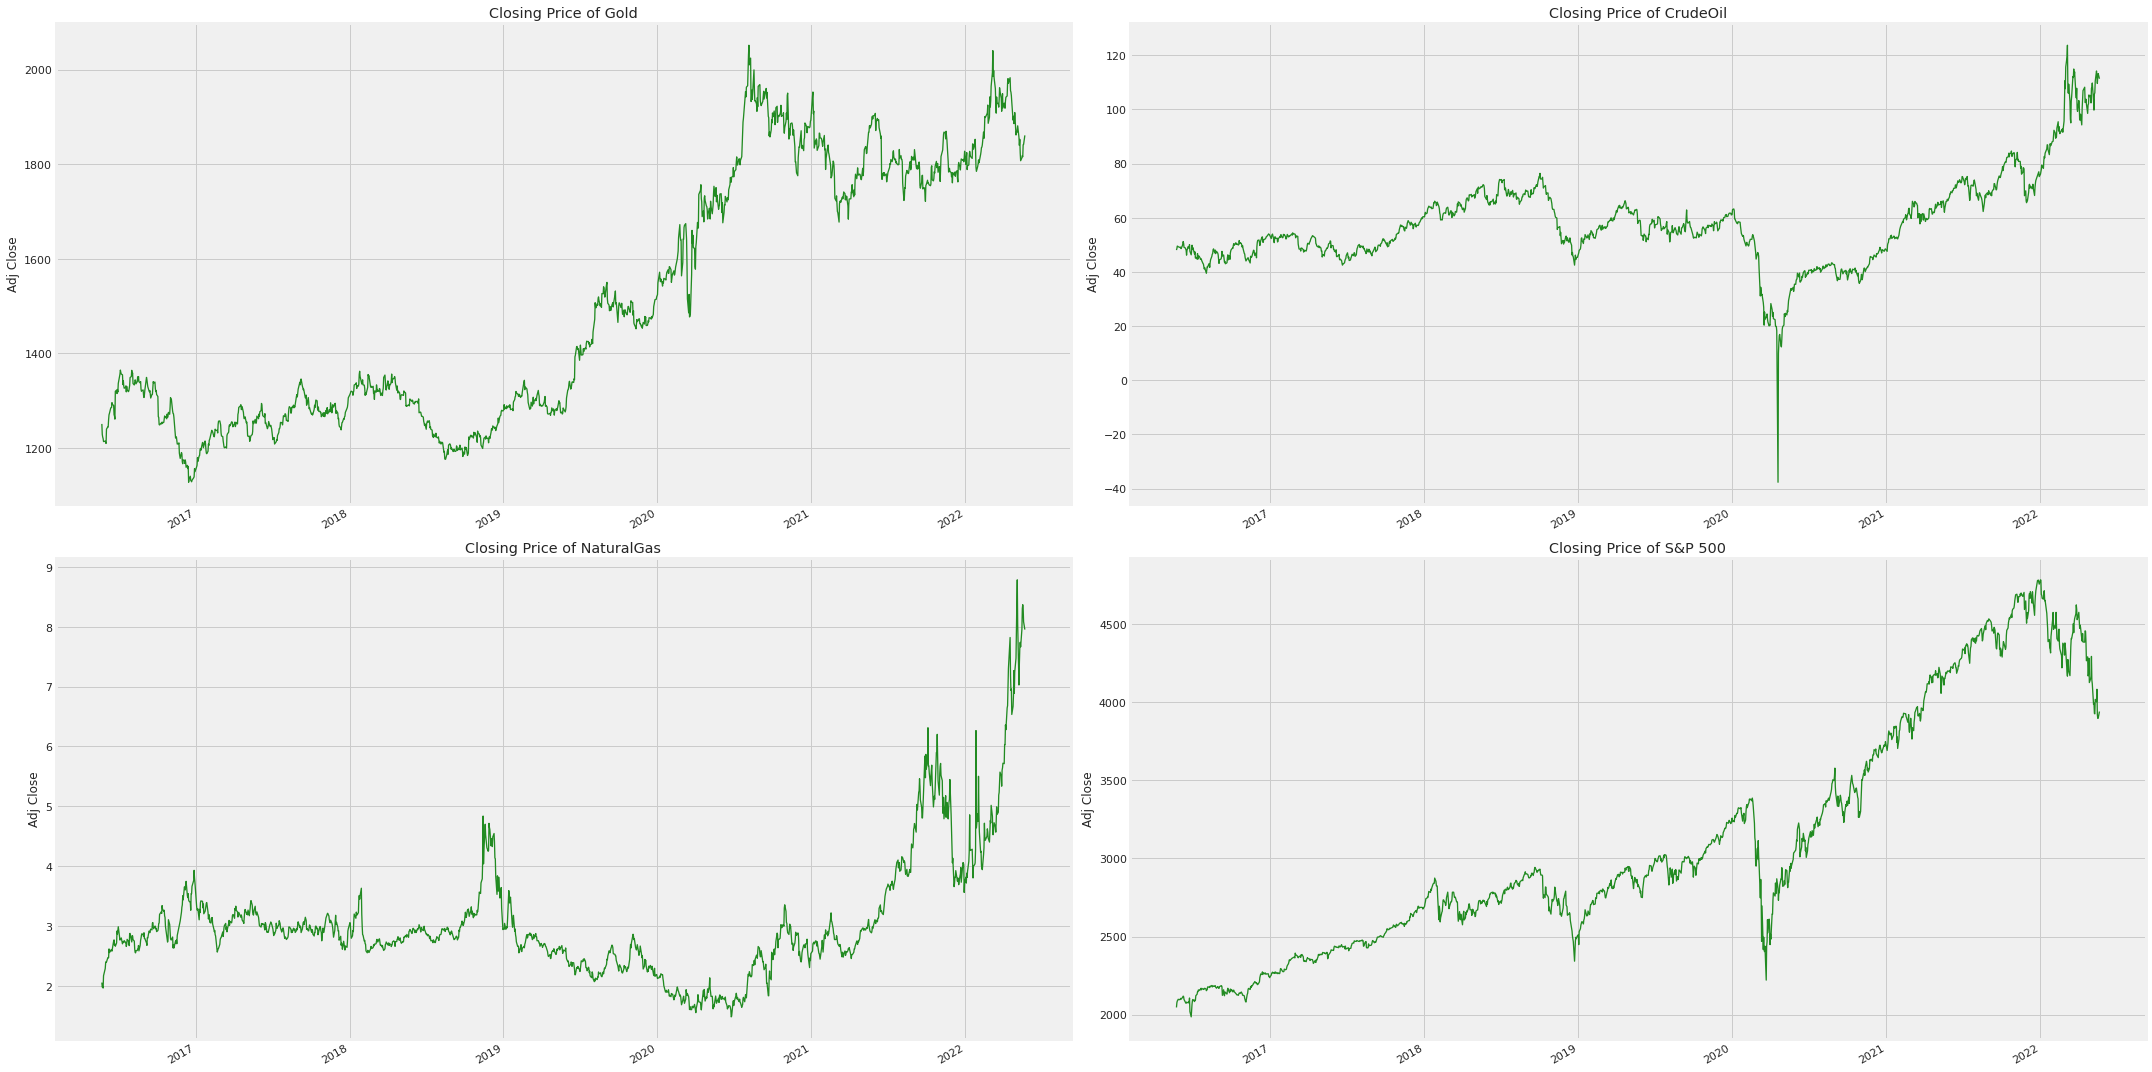

In [ ]:
# Lets see a historical view of the closing price

plt.figure(figsize=(30, 15))
plt.subplots_adjust(top=2.0, bottom=1.5, right=1.5)

"""
enumerate(iterable, start=0)

Parameters:
Iterable: any object that supports iteration
Start: the index value from which the counter is to be started, by default it is 0
however, the index value from which the counter is to be started will be 1
[0, 1, 2] will be [1, 2, 3]
"""

for i, commodity in enumerate(commodity_list, 1):
    plt.subplot(2, 2, i)
    commodity['Adj Close'].plot(linewidth=1.3, color='forestgreen')
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {cmdt_list[i - 1]}") # loop through the initial index

plt.tight_layout()

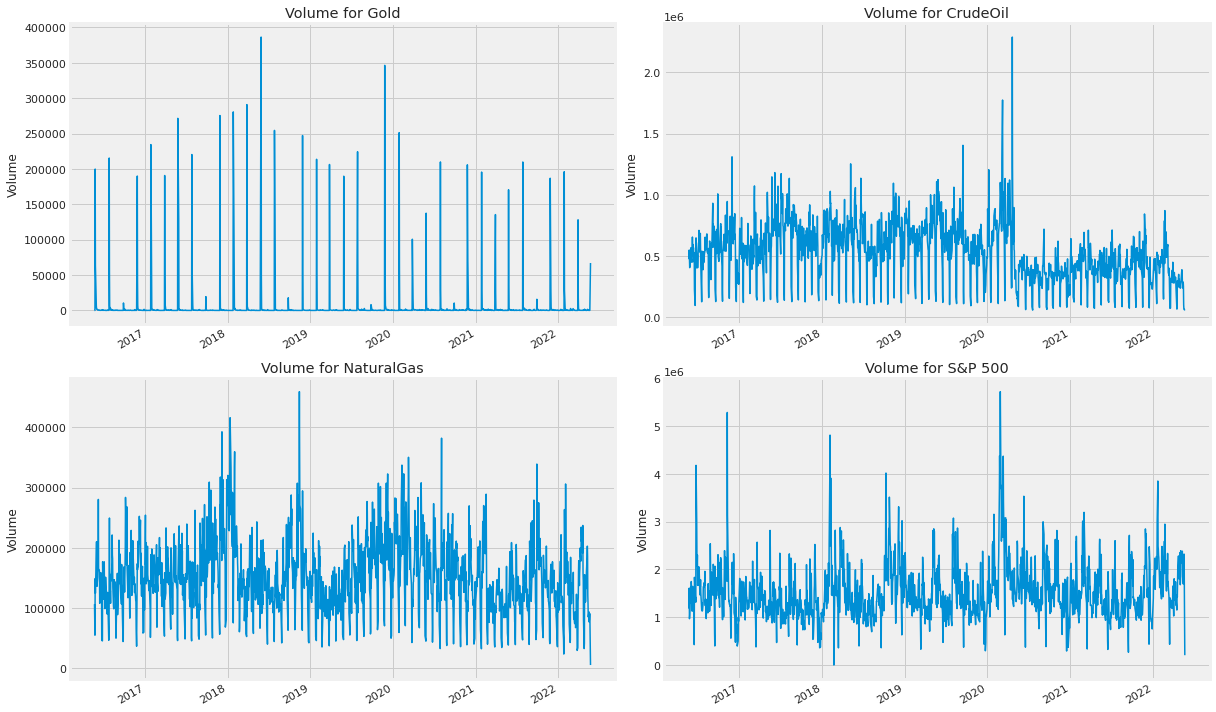

In [ ]:
# Now, we plot the total volume of commodity being traded each day
plt.figure(figsize=(17, 10))
plt.subplots_adjust(top=2.0, bottom=1.5, right=1.5)

for i, commodity in enumerate(commodity_list, 1):
    plt.subplot(2, 2, i)
    commodity['Volume'].plot(linewidth=1.5)
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Volume for {cmdt_list[i - 1]}")

plt.tight_layout()

Now that we've visualise the closing price and volume traded for each day, let go ahead and calculate the moving average for the commodities.

# 2. What was the moving average of the various Commodities?

In [ ]:
ma_day = [5, 20, 50, 200]

for ma in ma_day:
    for commodity in commodity_list:
        column_name = f"MA for {ma} days"
        commodity[column_name] = commodity['Adj Close'].rolling(ma).mean()

In [ ]:
print(gold.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Commodity Name',
       'MA for 5 days', 'MA for 20 days', 'MA for 50 days', 'MA for 200 days'],
      dtype='object')


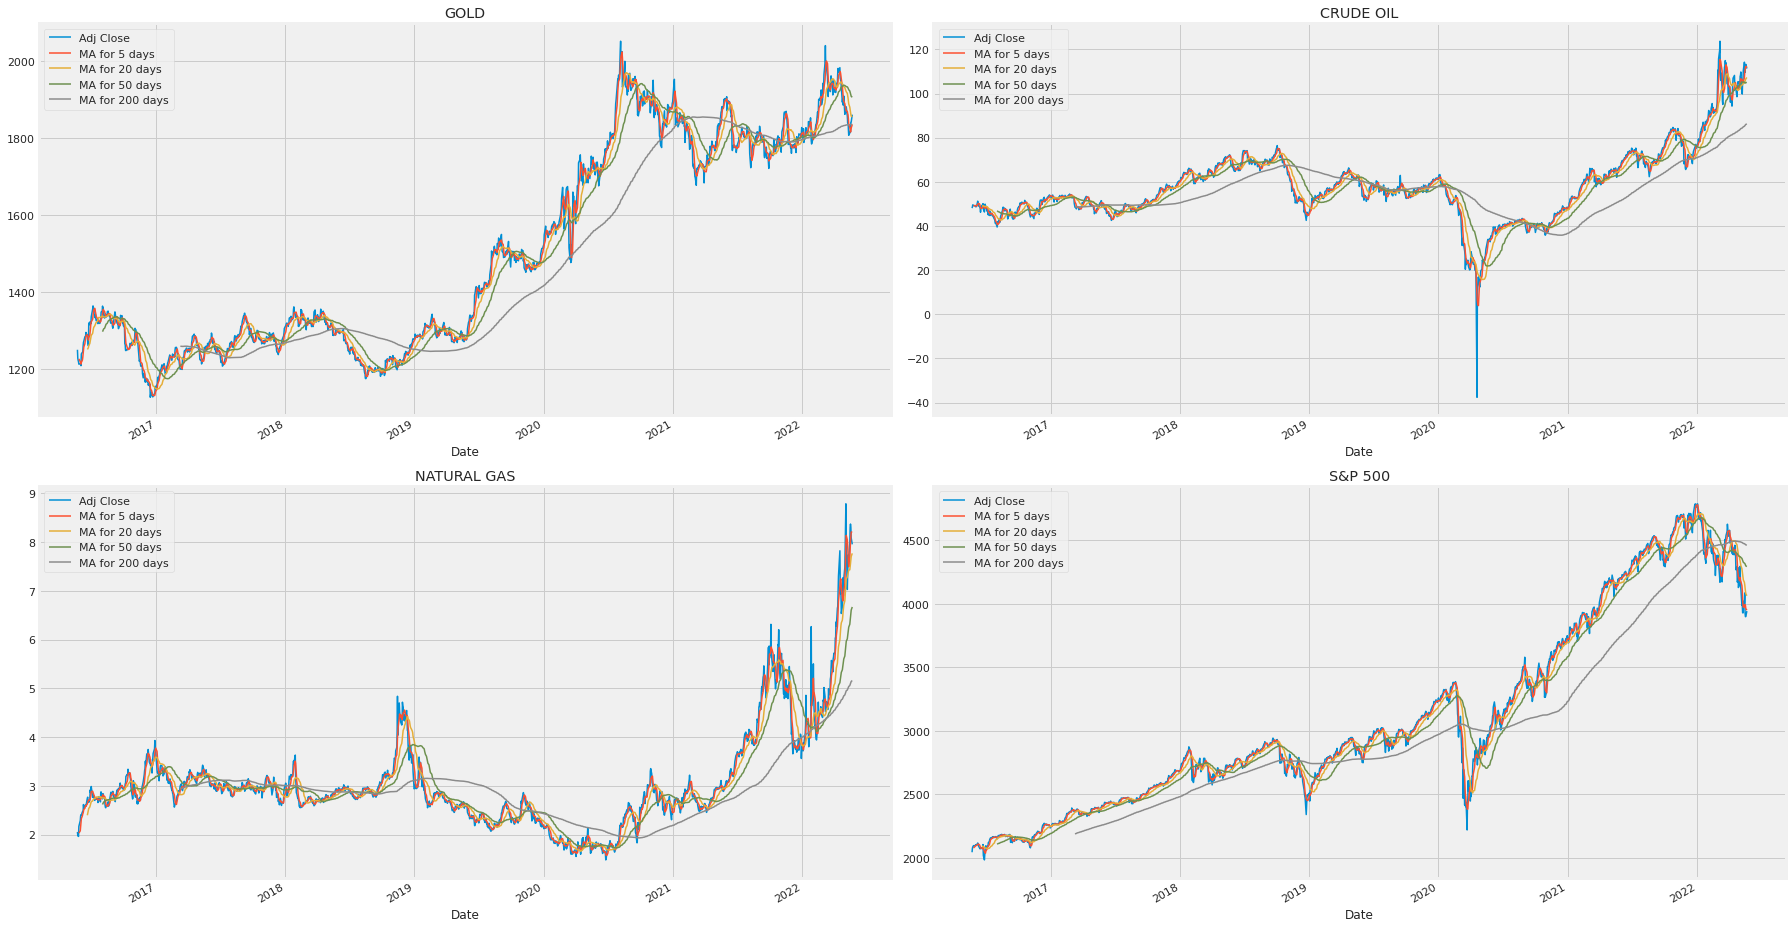

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(13)
fig.set_figwidth(25)

gold[['Adj Close', 'MA for 5 days', 'MA for 20 days', 'MA for 50 days', 'MA for 200 days']].plot(ax=axes[0,0], linewidth=1.5)
axes[0,0].set_title('GOLD')

oil[['Adj Close', 'MA for 5 days', 'MA for 20 days', 'MA for 50 days', 'MA for 200 days']].plot(ax=axes[0,1], linewidth=1.5)
axes[0,1].set_title('CRUDE OIL')

gas[['Adj Close', 'MA for 5 days', 'MA for 20 days', 'MA for 50 days', 'MA for 200 days']].plot(ax=axes[1,0], linewidth=1.5)
axes[1,0].set_title('NATURAL GAS')

US500[['Adj Close', 'MA for 5 days', 'MA for 20 days', 'MA for 50 days', 'MA for 200 days']].plot(ax=axes[1,1], linewidth=1.5)
axes[1,1].set_title('S&P 500')

fig.tight_layout()

# 3. What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the commodity. In order to do so we'll need to take a closer look at the daily changes of the commodity, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the commodity.

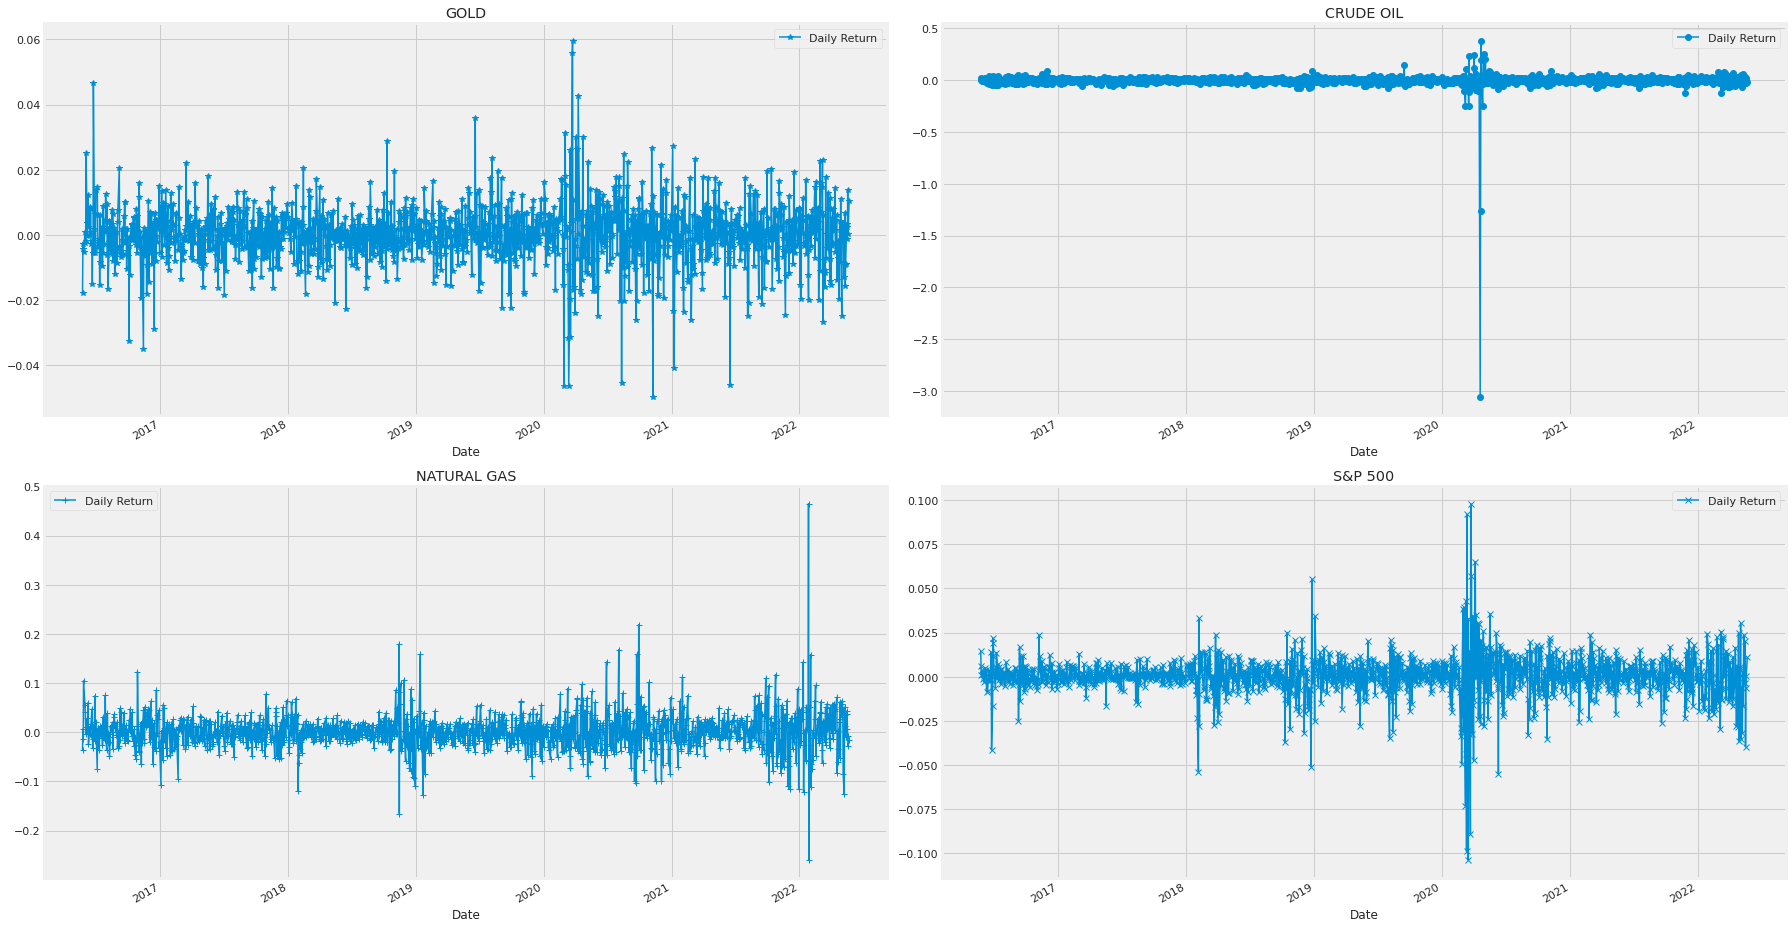

In [ ]:
# The pct_change will be used to find the percent change for each day
for commodity in commodity_list:
    commodity['Daily Return'] = commodity['Adj Close'].pct_change()

# Then we plot the daily return percentage
fig, axes = plt.subplots(2, 2)
fig.set_figheight(13)
fig.set_figwidth(25)

gold['Daily Return'].plot(ax=axes[0,0], legend=True, marker='*', linewidth=1.5)
axes[0,0].set_title('GOLD')

oil['Daily Return'].plot(ax=axes[0,1], legend=True, marker='o', linewidth=1.5)
axes[0,1].set_title('CRUDE OIL')

gas['Daily Return'].plot(ax=axes[1,0], legend=True, marker='+', linewidth=1.5)
axes[1,0].set_title('NATURAL GAS')

US500['Daily Return'].plot(ax=axes[1,1], legend=True, marker='x', linewidth=1.5)
axes[1,1].set_title('S&P 500')

fig.tight_layout()

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

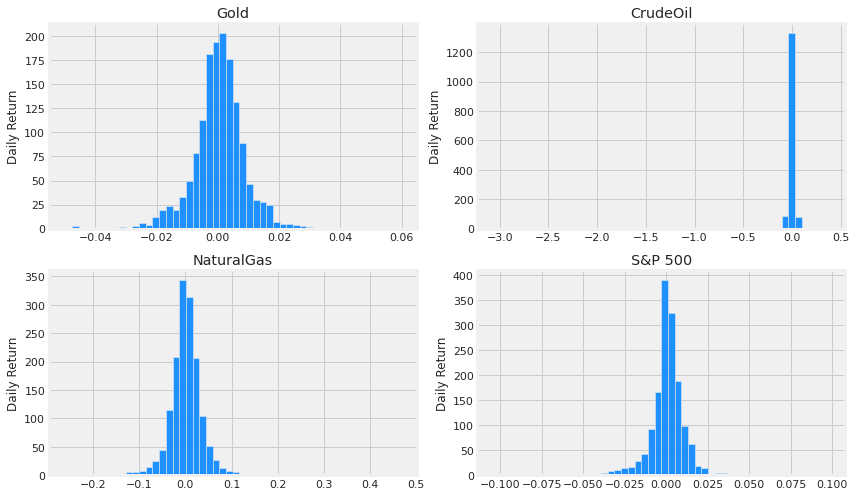

In [ ]:
plt.figure(figsize=(12, 7))

for i, commodity in enumerate(commodity_list, 1):
    plt.subplot(2, 2, i)
    commodity['Daily Return'].hist(bins=50, color='dodgerblue')
    plt.ylabel('Daily Return')
    plt.title(f'{cmdt_list[i - 1]}')

plt.tight_layout()

# 4. What was the correlation between different commodities closing price?

Now what if we wanted to analyze the returns of all the commodity in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the Commodity dataframes.

In [ ]:
# Grab all the closing prices for the commodity list into one DataFrame
closing_df = pd.concat(commodity_list, axis=1)['Adj Close']
closing_df.tail()

,Adj Close,Adj Close,Adj Close,Adj Close
Date,,,,
2022-05-17,1818.199951,112.400002,8.304,4084.75
2022-05-18,1815.900024,109.589996,8.368,3922.75
2022-05-19,1841.199951,112.209999,8.308,3897.75
2022-05-20,1841.800049,113.230003,8.083,3899.50
2022-05-23,1861.000000,111.330002,7.952,3942.00


In [ ]:
# Renaming all the columns of the closing_df to cmdt_list
for i, commodity in enumerate(closing_df, 1):
    closing_df.columns = cmdt_list

closing_df.tail()

,Gold,CrudeOil,NaturalGas,S&P 500
Date,,,,
2022-05-17,1818.199951,112.400002,8.304,4084.75
2022-05-18,1815.900024,109.589996,8.368,3922.75
2022-05-19,1841.199951,112.209999,8.308,3897.75
2022-05-20,1841.800049,113.230003,8.083,3899.50
2022-05-23,1861.000000,111.330002,7.952,3942.00


In [ ]:
# Now lets get the daily return for all the commodity.
# Make a new commidity return dataframe
commodity_returns = closing_df.pct_change()
commodity_returns.head()

,Gold,CrudeOil,NaturalGas,S&P 500
Date,,,,
2016-05-23,NaN,NaN,NaN,NaN
2016-05-24,-0.017744,0.011231,-0.036496,0.014546
2016-05-25,-0.004394,0.019334,0.006061,0.005904
2016-05-26,-0.002779,-0.001614,-0.014558,0.001198
2016-05-27,-0.005163,-0.003031,0.104941,0.003589


Now we can compare the daily percentage return of two commodities to check how correlated.

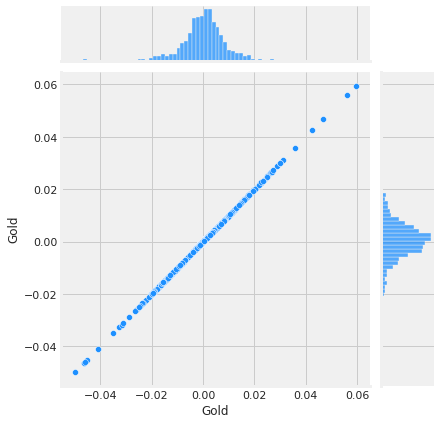

In [ ]:
# Comparing Gold to itself should show a perfectly linear relationship
sns.jointplot(x='Gold', y='Gold', kind='scatter', data=commodity_returns, color='dodgerblue')

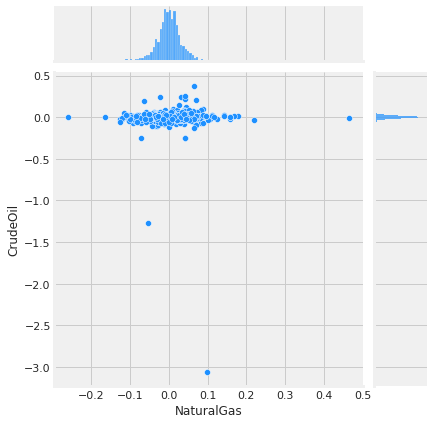

In [ ]:
# Comparing NaturalGas to CrudeOil
sns.jointplot(x='NaturalGas', y='CrudeOil', kind='scatter', data=commodity_returns, color='dodgerblue')

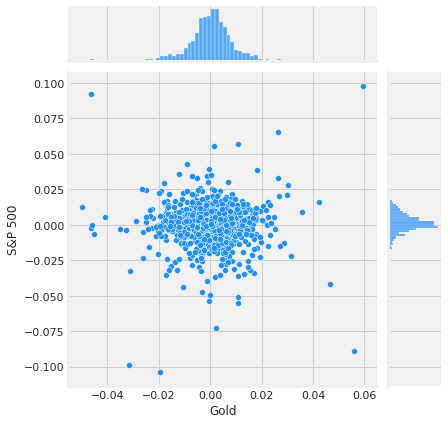

In [ ]:
# Compating Gold to US500
sns.jointplot(x='Gold', y='S&P 500', kind='scatter', data=commodity_returns, color='dodgerblue')

So now we can see that if two commodities are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. If it is negatively correlated,there would be no linear relationship between them.

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of commodities or asset. We can use sns.pairplot() to automatically create this plot

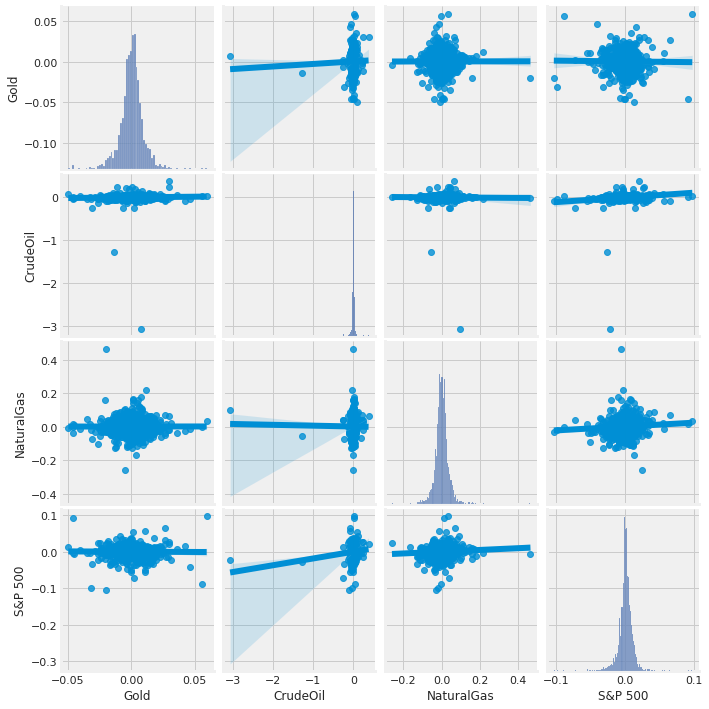

In [ ]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all comparisons.
sns.pairplot(commodity_returns, kind='reg')

we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

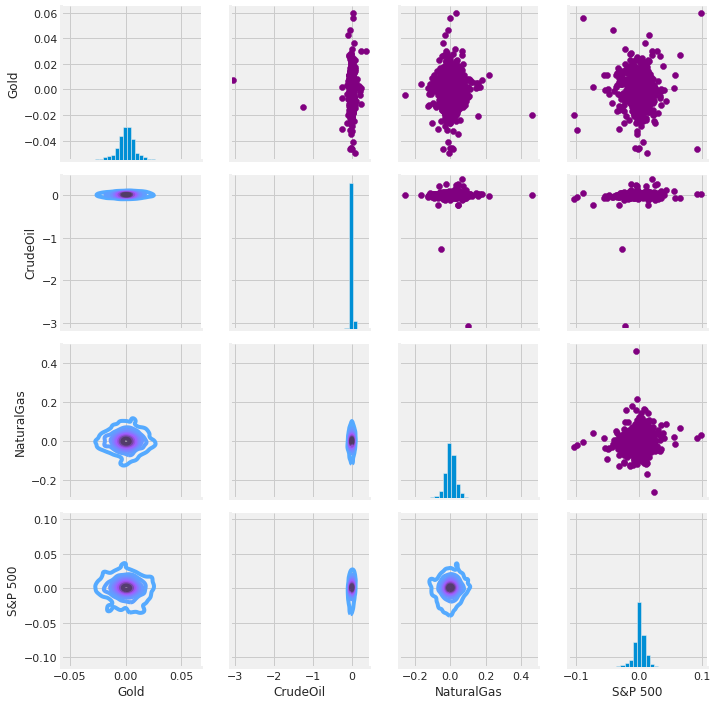

In [ ]:
# Commodity_returns

# Set up our figure by naming it return_fig, call PairGrid on the DataFrame
return_fig = sns.PairGrid(commodity_returns.dropna())

# Using map_upper we can specify what the upper triangle will look like
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, including the plot type (kde) or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

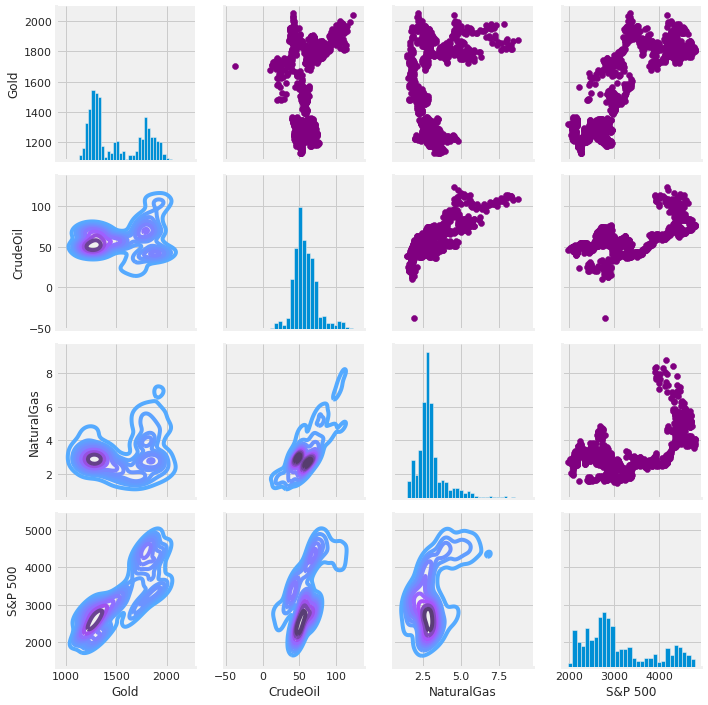

In [ ]:
# Closing_df

# Set up our figure by naming it return_fig, call PairGrid on the DataFrame
return_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, including the plot type (kde) or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

Finally, we could also do a correlation plot to get actual numerical values for the correlation between the commodities daily return values.

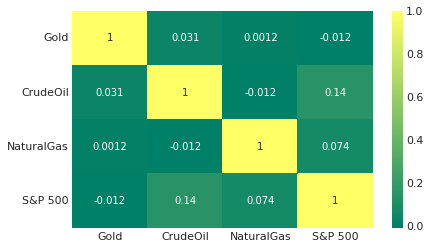

In [ ]:
# Using seaborn for correlation plot for daily returns
sns.heatmap(commodity_returns.corr(), annot=True, cmap='summer')

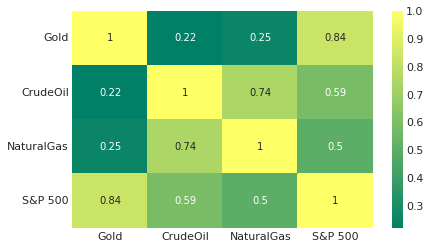

In [ ]:
# Using seaborn for correlation plot for Adj close
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

# 5. How much value do we put at risk by investing in a particular commodity?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

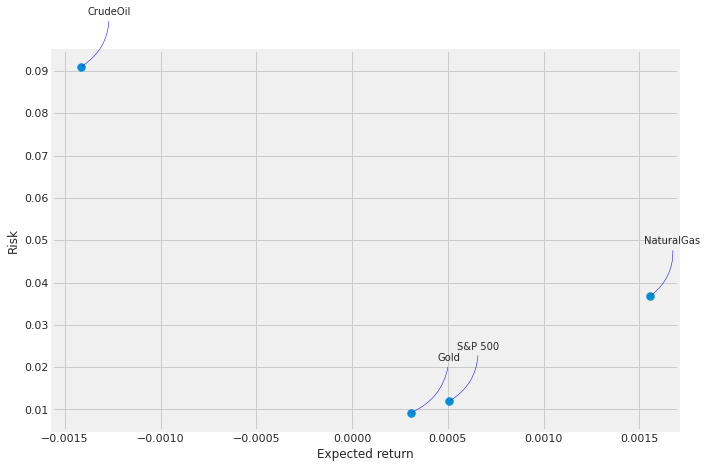

In [ ]:
# Let's define a new DataFrame as a cleaned version of the original commodity_returns DF
rets = commodity_returns.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x,y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# 6. Predicting the closing price of Gold

In [ ]:
gold.tail()

,Open,High,Low,Close,Adj Close,Volume,Commodity Name,MA for 5 days,MA for 20 days,MA for 50 days,MA for 200 days,Daily Return
Date,,,,,,,,,,,,
2022-05-17,1824.900024,1828.599976,1816.699951,1818.199951,1818.199951,121,Gold,1823.100000,1873.600006,1919.053997,1834.942493,0.002592
2022-05-18,1815.000000,1819.699951,1805.000000,1815.900024,1815.900024,311,Gold,1815.760010,1866.780005,1914.569998,1834.969493,-0.001265
2022-05-19,1810.900024,1841.199951,1810.699951,1841.199951,1841.199951,138,Gold,1819.239990,1861.595001,1911.675996,1835.149993,0.013932
2022-05-20,1839.099976,1841.800049,1836.300049,1841.800049,1841.800049,138,Gold,1826.119995,1857.135004,1908.549998,1835.558993,0.000326
2022-05-23,1844.400024,1864.300049,1843.300049,1861.000000,1861.000000,67030,Gold,1835.619995,1855.525006,1906.115999,1836.246993,0.010425


In [ ]:
df = gold.drop(labels=['Commodity Name','MA for 5 days', 'MA for 20 days', 'MA for 50 days', 'MA for 200 days', 'Daily Return'], axis=1)

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-05-23,1251.599976,1251.599976,1247.500000,1251.099976,1251.099976,56
2016-05-24,1240.000000,1240.000000,1228.199951,1228.900024,1228.900024,20
2016-05-25,1219.300049,1223.500000,1218.599976,1223.500000,1223.500000,5
2016-05-26,1232.599976,1232.599976,1220.099976,1220.099976,1220.099976,199778
2016-05-27,1220.300049,1223.199951,1206.400024,1213.800049,1213.800049,63739
...,...,...,...,...,...,...
2022-05-17,1824.900024,1828.599976,1816.699951,1818.199951,1818.199951,121
2022-05-18,1815.000000,1819.699951,1805.000000,1815.900024,1815.900024,311
2022-05-19,1810.900024,1841.199951,1810.699951,1841.199951,1841.199951,138


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000
mean,1501.023444,1507.880067,1494.132583,1501.076093,1501.076093,5852.849669
std,262.960006,265.652862,260.443761,263.136581,263.136581,32501.901101
min,1126.900024,1132.800049,1123.900024,1127.800049,1127.800049,0.000000
25%,1274.925018,1277.925018,1270.300049,1274.350037,1274.350037,38.250000
50%,1351.099976,1355.700012,1344.150024,1351.500000,1351.500000,160.000000
75%,1783.475006,1790.649963,1775.424988,1781.975006,1781.975006,544.750000
max,2053.600098,2072.000000,2040.000000,2051.500000,2051.500000,386334.000000


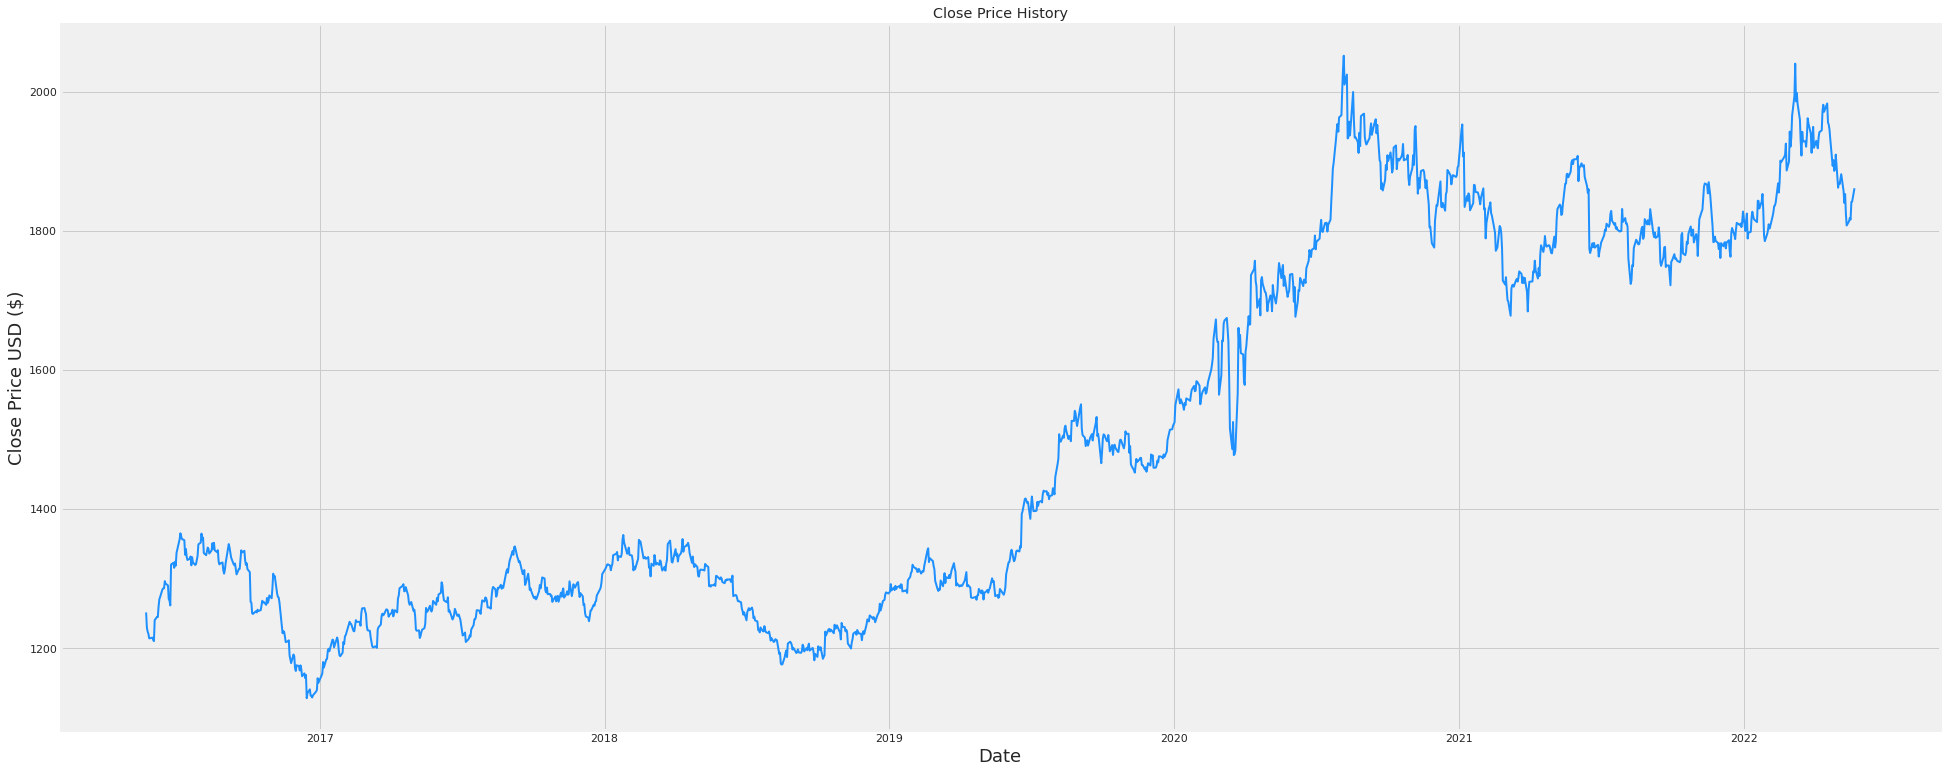

In [ ]:
plt.figure(figsize=(30, 13))
plt.title('Close Price History')
plt.plot(df['Close'], linewidth=2, color='dodgerblue')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# Creat a new dataframe with only the Close column
close_df = df.filter(['Close'])
# Convert the dataframe to a numpy array
close_df_np = close_df.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil(len(close_df_np) * .90))

training_data_len

1359

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(close_df_np)

scaled_data

array([[0.13348483],
       [0.1094511 ],
       [0.10360502],
       ...,
       [0.77232861],
       [0.77297828],
       [0.7937642 ]])

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

[array([0.13348483, 0.1094511 , 0.10360502, 0.09992414, 0.09310383,
       0.09418643, 0.09104686, 0.08877342, 0.1215762 , 0.12644791,
       0.12623144, 0.14290355, 0.15416251, 0.15762692, 0.16953555,
       0.17083462, 0.17105122, 0.18220194, 0.1783046 , 0.17559809,
       0.15448734, 0.15178084, 0.14441909, 0.20807617, 0.21078268,
       0.20298799, 0.21229835, 0.20634404, 0.22615558, 0.24748294,
       0.25668506, 0.25148851, 0.2476994 , 0.24596727, 0.22334084,
       0.2323265 , 0.22030964, 0.21511309, 0.21717006, 0.2205261 ,
       0.2067771 , 0.2194435 , 0.21143222, 0.2073184 , 0.20883394,
       0.21522132, 0.22139224, 0.23947165, 0.24206992, 0.25614376,
       0.2471581 , 0.25008121, 0.22583088, 0.22258308, 0.22864562,
       0.23438347, 0.23243473, 0.22518135, 0.23005306, 0.24109555])]
[0.23265120028545172]

[array([0.13348483, 0.1094511 , 0.10360502, 0.09992414, 0.09310383,
       0.09418643, 0.09104686, 0.08877342, 0.1215762 , 0.12644791,
       0.12623144, 0.14290355, 0.15

(1299, 60, 1)

Creating our deep learning model

In [ ]:
# LSTM
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=100, verbose='auto')


Epoch 1/100
41/41 [==============================] - 9s 107ms/step - loss: 0.0306
Epoch 2/100
41/41 [==============================] - 4s 97ms/step - loss: 0.0015
Epoch 3/100
41/41 [==============================] - 4s 100ms/step - loss: 0.0013
Epoch 4/100
41/41 [==============================] - 4s 98ms/step - loss: 0.0012
Epoch 5/100
41/41 [==============================] - 4s 99ms/step - loss: 0.0013
Epoch 6/100
41/41 [==============================] - 4s 98ms/step - loss: 0.0013
Epoch 7/100
41/41 [==============================] - 4s 102ms/step - loss: 0.0010
Epoch 8/100
41/41 [==============================] - 4s 101ms/step - loss: 0.0010
Epoch 9/100
41/41 [==============================] - 4s 105ms/step - loss: 9.4563e-04
Epoch 10/100
41/41 [==============================] - 4s 107ms/step - loss: 0.0010
Epoch 11/100
41/41 [==============================] - 4s 106ms/step - loss: 8.9461e-04
Epoch 12/100
41/41 [==============================] - 5s 130ms/step - loss: 8.4325e-04
Epoch

In [ ]:
# Creating the testing dataset
test_data = scaled_data[training_data_len - 60:, :]
# Creat the data sets x_test and y_test
x_test = []
y_test = close_df_np[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
# Evaluation Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

# MSE
mse = mean_squared_error(y_test, predictions)
print(f'Mean Square Error: {mse}')

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Root Mean Square Error: {rmse}')

# MAE
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

# MAPE
mape = mean_absolute_percentage_error(y_test, predictions)
print(f'Mean Absolute Percentage Error: {mape}')

# R2 Score
r2score = r2_score(y_test, predictions)
print(f'R2 Score: {r2score}')

Mean Square Error: 505.55505136188293
Root Mean Square Error: 22.48455139338748
Mean Absolute Error: 18.381454366721854
Mean Absolute Percentage Error: 0.009818824070591627
R2 Score: 0.8815672267074849


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


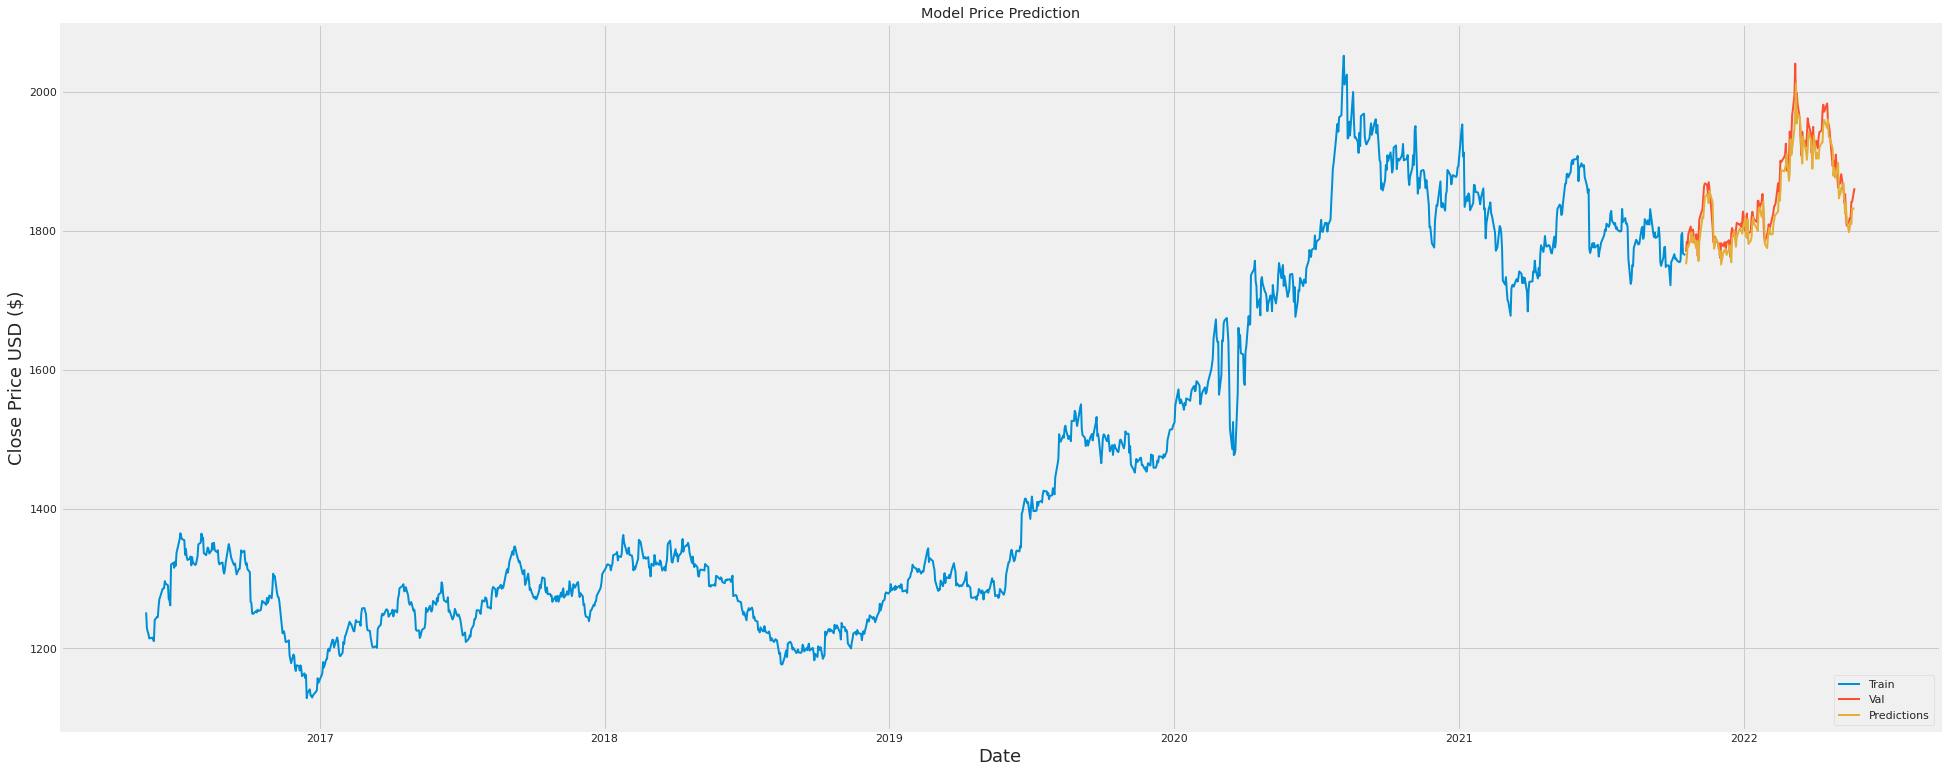

In [ ]:
# Plot the data
train = close_df[:training_data_len]
valid = close_df[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(30, 13))
plt.title('Model Price Prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'], linewidth=2)
plt.plot(valid[['Close', 'Predictions']], linewidth=2)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()